In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "proyecto_lesiones"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [3]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
def dist_per_feature(feat):
    prime = data[data['injury'] == 0][feat]
    injured = data[data['injury'] == 1][feat]

    histogram = [prime, injured]
    fig = ff.create_distplot(histogram, group_labels=['prime', 'injured'], colors = ['royalblue', 'indianred'])
  
    fig.update_layout(
        title_text = feat + " distribution", title_font_size = 30, title_x = 0.5
    )
    fig.show()

In [5]:
data = pd.read_csv("day_approach_maskedID_timeseries.csv")
data.drop(columns=['Athlete ID', 'Date'], inplace= True)
data.describe()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,injury
count,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,...,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000
mean,0.829561,7.038187,0.691381,0.579930,0.073016,0.116237,0.163492,0.247788,0.349802,0.195898,...,7.051319,0.695031,0.580347,0.072595,0.116120,0.162308,0.247550,0.349503,0.196224,0.013632
std,0.580696,7.473216,2.317657,1.811938,0.483480,0.326010,0.549664,0.257262,0.368300,0.190321,...,7.470174,2.323844,1.814538,0.483691,0.326016,0.554031,0.256718,0.368042,0.190568,0.115960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000
50%,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.160000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.170000,0.000000
75%,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,0.000000
max,2.000000,55.900000,42.200000,48.000000,40.000000,2.000000,10.220000,1.000000,1.000000,1.000000,...,55.900000,42.200000,48.000000,40.000000,2.000000,20.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, '# Instancias - Injury == 1')

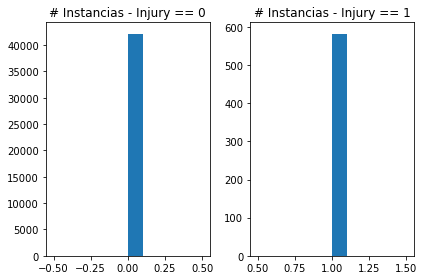

In [6]:
#Histogramas del numero total de instancias

fig, axs= plt.subplots(1,2, sharey=False, tight_layout=True)

axs[0].hist(data['injury'][data['injury']==0])
axs[0].set_title('# Instancias - Injury == 0')
axs[1].hist(data['injury'][data['injury']==1])
axs[1].set_title('# Instancias - Injury == 1')
#save_fig("distribucion_clases")



In [7]:
features = ['nr. sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2', 'km sprinting','strength training', 
            'hours alternative', 'perceived exertion','perceived trainingSuccess', 'perceived recovery']
#Estructura del Diccionario de diccionarios con la información de por día y feature
models_keys = {
    "features"  : {},
    "days"      : {}
}

termination = [""]
termination.extend([ '.' + str(ter) for ter in range(1,7)])

for f in features:
    models_keys["features"][f] = [
        f+ter for ter in termination
    ]

for days_before in range(7):
    models_keys['days'][days_before + 1] = [
        f+termination[days_before] for f in features
    ]

In [8]:
#LLenar el diccionario con al informacion del dataset
models_data = {
    "features" : {},
    "days"     : {}
}

for f in models_keys['features'].keys():
    columns = models_keys['features'][f]
    #columns.append("injury")
    models_data['features'][f] = []
    models_data['features'][f] = data[columns]

for f in models_keys['days'].keys():
    columns = models_keys['days'][f]
   # columns.append("injury")
    models_data['days'][f] = []
    models_data['days'][f] = data[columns]



# HeatMap

In [9]:
corr_df = data.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,nr. sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,km sprinting.1,strength training.1,hours alternative.1,perceived exertion.1,perceived trainingSuccess.1,perceived recovery.1,nr. sessions.2,total km.2,km Z3-4.2,km Z5-T1-T2.2,km sprinting.2,strength training.2,hours alternative.2,perceived exertion.2,perceived trainingSuccess.2,perceived recovery.2,nr. sessions.3,total km.3,km Z3-4.3,km Z5-T1-T2.3,km sprinting.3,strength training.3,hours alternative.3,perceived exertion.3,perceived trainingSuccess.3,perceived recovery.3,nr. sessions.4,total km.4,km Z3-4.4,km Z5-T1-T2.4,km sprinting.4,strength training.4,hours alternative.4,perceived exertion.4,perceived trainingSuccess.4,perceived recovery.4,nr. sessions.5,total km.5,km Z3-4.5,km Z5-T1-T2.5,km sprinting.5,strength training.5,hours alternative.5,perceived exertion.5,perceived trainingSuccess.5,perceived recovery.5,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,injury
nr. sessions,1.000000,0.596912,0.168277,0.176642,0.081524,0.312780,0.236287,0.542963,0.510929,0.555306,0.262761,0.213076,0.080043,0.082879,0.001795,0.123283,0.075338,0.156258,0.158623,0.157880,0.302577,0.247896,0.089096,0.093744,0.018531,0.092850,0.064254,0.176075,0.182005,0.179803,0.263281,0.243082,0.092399,0.096494,0.015654,0.055245,0.054197,0.164395,0.160982,0.161836,0.254929,0.229159,0.076056,0.065886,0.010679,0.063325,0.056985,0.145212,0.150314,0.150918,0.257635,0.241995,0.069082,0.095351,0.034253,0.032969,0.056444,0.148792,0.155320,0.152800,0.233104,0.198261,0.045521,0.071415,0.017262,0.070207,0.044208,0.129306,0.139419,0.135630,0.024088
total km,0.596912,1.000000,0.391130,0.328533,0.068880,-0.113621,-0.173292,0.339113,0.302535,0.349504,0.202723,0.332265,0.067742,0.028657,-0.001704,0.108358,-0.061207,0.028452,0.071233,0.085201,0.262139,0.475614,0.184952,0.193314,0.034812,-0.033939,-0.103103,0.126367,0.119304,0.140179,0.223199,0.400285,0.114835,0.136082,-0.008274,0.033984,-0.087432,0.075774,0.087243,0.104498,0.228581,0.396150,0.152029,0.105977,0.017864,0.028251,-0.097006,0.079477,0.089402,0.107303,0.206764,0.436127,0.149160,0.175339,-0.005813,-0.068095,-0.085848,0.082312,0.085821,0.104418,0.186704,0.324134,0.087291,0.046730,0.015791,0.046795,-0.075958,0.026235,0.062501,0.069915,0.015945
km Z3-4,0.168277,0.391130,1.000000,-0.086790,-0.025474,-0.064500,-0.058348,0.183381,0.104700,0.109171,0.039958,0.084049,-0.048386,-0.074259,-0.027507,0.045574,0.004551,-0.030680,0.031588,0.012095,0.071272,0.152300,0.092685,0.040411,0.025913,-0.050714,-0.036719,0.038368,0.053652,0.038901,0.073292,0.151999,0.079150,0.054688,-0.020662,-0.001296,-0.025827,0.032761,0.045207,0.030561,0.086943,0.116116,0.089342,-0.026613,-0.006914,0.071109,-0.027108,0.026985,0.047378,0.035691,0.071017,0.168533,0.106267,0.071115,-0.015929,-0.049309,-0.020003,0.043295,0.048243,0.036860,0.049913,0.065963,-0.003161,-0.051439,0.004103,0.044122,-0.021680,-0.021365,0.022653,0.004662,0.000663
km Z5-T1-T2,0.176642,0.328533,-0.086790,1.000000,0.003298,-0.082506,-0.061606,0.255398,0.098254,0.138645,0.080186,0.034156,-0.073659,-0.078071,-0.035485,0.175869,-0.016082,-0.014146,0.020787,0.037807,0.098012,0.191144,0.101389,0.177193,0.029903,-0.055686,-0.039667,0.091954,0.052324,0.085026,0.060725,0.109970,-0.024865,0.059585,-0.018055,0.027166,-0.025762,0.026566,0.022893,0.042453,0.083072,0.120087,0.036610,0.069351,0.024596,0.011674,-0.038691,0.051245,0.036274,0.051755,0.081260,0.180234,0.022211,0.194275,-0.003277,-0.056469,-0.022558,0.067904,0.038536,0.069361,0.061082,0.048311,-0.024922,-0.037275,0.015416,0.093961,-0.035926,-0.001769,0.013813,0.027813,0.019899
km sprinting,0.081524,0.068880,-0.025474,0.003298,1.000000,-0.025971,-0.033757,0.047123,0.000588,0.032217,0.010965,0.015252,0.003113

In [10]:
corr_df = models_data["days"][1].corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery
nr. sessions,1.000000,0.596912,0.168277,0.176642,0.081524,0.312780,0.236287,0.542963,0.510929,0.555306
total km,0.596912,1.000000,0.391130,0.328533,0.068880,-0.113621,-0.173292,0.339113,0.302535,0.349504
km Z3-4,0.168277,0.391130,1.000000,-0.086790,-0.025474,-0.064500,-0.058348,0.183381,0.104700,0.109171
km Z5-T1-T2,0.176642,0.328533,-0.086790,1.000000,0.003298,-0.082506,-0.061606,0.255398,0.098254,0.138645
km sprinting,0.081524,0.068880,-0.025474,0.003298,1.000000,-0.025971,-0.033757,0.047123,0.000588,0.032217
strength training,0.312780,-0.113621,-0.064500,-0.082506,-0.025971,1.000000,0.015290,0.173033,0.190845,0.147410
hours alternative,0.236287,-0.173292,-0.058348,-0.061606,-0.033757,0.015290,1.000000,0.140572,0.129819,0.125645
perceived exertion,0.542963,0.339113,0.183381,0.255398,0.047123,0.173033,0.140572,1.000000,0.658076,0.710083
perceived trainingSuccess,0.510929,0.302535,0.104700,0.098254,0.000588,0.190845,0.129819,0.658076,1.000000,0.555115
perceived recovery,0.555306,0.349504,0.109171,0.138645,0.032217,0.147410,0.125645,0.710083,0.555115,1.000000


In [11]:
"""
Para uso en IDE
HeatMap por dia

for i, day in enumerate(models_data['days']):    
    corr_df = models_data["days"][day].corr(method='pearson')
    corr_df.style.background_gradient(cmap='coolwarm')
"""

'\nPara uso en IDE\nHeatMap por dia\n\nfor i, day in enumerate(models_data[\'days\']):    \n    corr_df = models_data["days"][day].corr(method=\'pearson\')\n    corr_df.style.background_gradient(cmap=\'coolwarm\')\n'

In [12]:
corr_df = models_data["days"][2].corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,nr. sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,km sprinting.1,strength training.1,hours alternative.1,perceived exertion.1,perceived trainingSuccess.1,perceived recovery.1
nr. sessions.1,1.000000,0.597000,0.168479,0.176465,0.080718,0.312878,0.236931,0.542189,0.511800,0.555164
total km.1,0.597000,1.000000,0.390159,0.327636,0.070357,-0.113209,-0.172484,0.337980,0.302997,0.349153
km Z3-4.1,0.168479,0.390159,1.000000,-0.086003,-0.025191,-0.065118,-0.057742,0.184051,0.105091,0.109438
km Z5-T1-T2.1,0.176465,0.327636,-0.086003,1.000000,0.004379,-0.081000,-0.062082,0.254868,0.097221,0.137594
km sprinting.1,0.080718,0.070357,-0.025191,0.004379,1.000000,-0.025760,-0.034315,0.048025,0.001826,0.032611
strength training.1,0.312878,-0.113209,-0.065118,-0.081000,-0.025760,1.000000,0.015345,0.173487,0.192136,0.149479
hours alternative.1,0.236931,-0.172484,-0.057742,-0.062082,-0.034315,0.015345,1.000000,0.141304,0.130103,0.124992
perceived exertion.1,0.542189,0.337980,0.184051,0.254868,0.048025,0.173487,0.141304,1.000000,0.658454,0.711470
perceived trainingSuccess.1,0.511800,0.302997,0.105091,0.097221,0.001826,0.192136,0.130103,0.658454,1.000000,0.556448
perceived recovery.1,0.555164,0.349153,0.109438,0.137594,0.032611,0.149479,0.124992,0.711470,0.556448,1.000000


In [13]:
corr_df = models_data["days"][3].corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,nr. sessions.2,total km.2,km Z3-4.2,km Z5-T1-T2.2,km sprinting.2,strength training.2,hours alternative.2,perceived exertion.2,perceived trainingSuccess.2,perceived recovery.2
nr. sessions.2,1.000000,0.597143,0.168798,0.176296,0.081486,0.312105,0.235434,0.541703,0.511051,0.555148
total km.2,0.597143,1.000000,0.392557,0.328347,0.069536,-0.113512,-0.172866,0.339440,0.303568,0.349268
km Z3-4.2,0.168798,0.392557,1.000000,-0.086529,-0.025636,-0.064737,-0.057639,0.183350,0.105496,0.109107
km Z5-T1-T2.2,0.176296,0.328347,-0.086529,1.000000,0.003001,-0.081441,-0.061778,0.256087,0.097305,0.138943
km sprinting.2,0.081486,0.069536,-0.025636,0.003001,1.000000,-0.025355,-0.034426,0.046312,0.001034,0.031517
strength training.2,0.312105,-0.113512,-0.064737,-0.081441,-0.025355,1.000000,0.014159,0.171796,0.190484,0.148243
hours alternative.2,0.235434,-0.172866,-0.057639,-0.061778,-0.034426,0.014159,1.000000,0.140486,0.128612,0.124879
perceived exertion.2,0.541703,0.339440,0.183350,0.256087,0.046312,0.171796,0.140486,1.000000,0.658268,0.709504
perceived trainingSuccess.2,0.511051,0.303568,0.105496,0.097305,0.001034,0.190484,0.128612,0.658268,1.000000,0.555384
perceived recovery.2,0.555148,0.349268,0.109107,0.138943,0.031517,0.148243,0.124879,0.709504,0.555384,1.000000


In [14]:
corr_df = models_data["days"][4].corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,nr. sessions.3,total km.3,km Z3-4.3,km Z5-T1-T2.3,km sprinting.3,strength training.3,hours alternative.3,perceived exertion.3,perceived trainingSuccess.3,perceived recovery.3
nr. sessions.3,1.000000,0.596899,0.168728,0.175701,0.081225,0.311885,0.236751,0.541482,0.511530,0.555695
total km.3,0.596899,1.000000,0.390580,0.328929,0.069260,-0.113474,-0.173533,0.340202,0.304007,0.350144
km Z3-4.3,0.168728,0.390580,1.000000,-0.086573,-0.025783,-0.065077,-0.057844,0.185015,0.106355,0.109635
km Z5-T1-T2.3,0.175701,0.328929,-0.086573,1.000000,0.003580,-0.080861,-0.061907,0.255496,0.096977,0.138610
km sprinting.3,0.081225,0.069260,-0.025783,0.003580,1.000000,-0.025073,-0.034328,0.047802,0.001230,0.032137
strength training.3,0.311885,-0.113474,-0.065077,-0.080861,-0.025073,1.000000,0.016121,0.171041,0.190333,0.147404
hours alternative.3,0.236751,-0.173533,-0.057844,-0.061907,-0.034328,0.016121,1.000000,0.138755,0.128383,0.123910
perceived exertion.3,0.541482,0.340202,0.185015,0.255496,0.047802,0.171041,0.138755,1.000000,0.657756,0.710133
perceived trainingSuccess.3,0.511530,0.304007,0.106355,0.096977,0.001230,0.190333,0.128383,0.657756,1.000000,0.555476
perceived recovery.3,0.555695,0.350144,0.109635,0.138610,0.032137,0.147404,0.123910,0.710133,0.555476,1.000000


In [15]:
corr_df = models_data["days"][5].corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,nr. sessions.4,total km.4,km Z3-4.4,km Z5-T1-T2.4,km sprinting.4,strength training.4,hours alternative.4,perceived exertion.4,perceived trainingSuccess.4,perceived recovery.4
nr. sessions.4,1.000000,0.596678,0.169451,0.175624,0.079480,0.311660,0.237362,0.542324,0.511098,0.556146
total km.4,0.596678,1.000000,0.392211,0.326920,0.068745,-0.114187,-0.173295,0.341294,0.304218,0.349471
km Z3-4.4,0.169451,0.392211,1.000000,-0.086492,-0.026081,-0.065366,-0.057047,0.185955,0.106603,0.108460
km Z5-T1-T2.4,0.175624,0.326920,-0.086492,1.000000,0.003758,-0.081404,-0.062071,0.254445,0.096290,0.137028
km sprinting.4,0.079480,0.068745,-0.026081,0.003758,1.000000,-0.025302,-0.034815,0.046304,0.000455,0.032577
strength training.4,0.311660,-0.114187,-0.065366,-0.081404,-0.025302,1.000000,0.015855,0.170964,0.190040,0.148944
hours alternative.4,0.237362,-0.173295,-0.057047,-0.062071,-0.034815,0.015855,1.000000,0.139051,0.127268,0.124630
perceived exertion.4,0.542324,0.341294,0.185955,0.254445,0.046304,0.170964,0.139051,1.000000,0.657970,0.711188
perceived trainingSuccess.4,0.511098,0.304218,0.106603,0.096290,0.000455,0.190040,0.127268,0.657970,1.000000,0.555506
perceived recovery.4,0.556146,0.349471,0.108460,0.137028,0.032577,0.148944,0.124630,0.711188,0.555506,1.000000


In [16]:
corr_df = models_data["days"][6].corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,nr. sessions.5,total km.5,km Z3-4.5,km Z5-T1-T2.5,km sprinting.5,strength training.5,hours alternative.5,perceived exertion.5,perceived trainingSuccess.5,perceived recovery.5
nr. sessions.5,1.000000,0.597363,0.170052,0.175987,0.077796,0.312016,0.236277,0.542906,0.512197,0.556043
total km.5,0.597363,1.000000,0.392861,0.327650,0.068838,-0.113005,-0.173193,0.342797,0.305922,0.351635
km Z3-4.5,0.170052,0.392861,1.000000,-0.086801,-0.026239,-0.065050,-0.057339,0.185293,0.106733,0.109869
km Z5-T1-T2.5,0.175987,0.327650,-0.086801,1.000000,0.003618,-0.081736,-0.062150,0.256901,0.096666,0.138960
km sprinting.5,0.077796,0.068838,-0.026239,0.003618,1.000000,-0.024898,-0.034576,0.046178,0.000540,0.031224
strength training.5,0.312016,-0.113005,-0.065050,-0.081736,-0.024898,1.000000,0.017393,0.170373,0.189679,0.146858
hours alternative.5,0.236277,-0.173193,-0.057339,-0.062150,-0.034576,0.017393,1.000000,0.137707,0.126008,0.123433
perceived exertion.5,0.542906,0.342797,0.185293,0.256901,0.046178,0.170373,0.137707,1.000000,0.658260,0.711086
perceived trainingSuccess.5,0.512197,0.305922,0.106733,0.096666,0.000540,0.189679,0.126008,0.658260,1.000000,0.555633
perceived recovery.5,0.556043,0.351635,0.109869,0.138960,0.031224,0.146858,0.123433,0.711086,0.555633,1.000000


In [17]:
corr_df = models_data["days"][7].corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6
nr. sessions.6,1.000000,0.596482,0.169659,0.174936,0.079022,0.313035,0.233979,0.543662,0.511937,0.557488
total km.6,0.596482,1.000000,0.392719,0.328885,0.069105,-0.113301,-0.171675,0.343018,0.305417,0.350758
km Z3-4.6,0.169659,0.392719,1.000000,-0.086050,-0.026567,-0.064187,-0.057052,0.185138,0.108020,0.107976
km Z5-T1-T2.6,0.174936,0.328885,-0.086050,1.000000,0.004505,-0.082867,-0.061069,0.254928,0.096252,0.137627
km sprinting.6,0.079022,0.069105,-0.026567,0.004505,1.000000,-0.025595,-0.034631,0.045756,0.000521,0.031556
strength training.6,0.313035,-0.113301,-0.064187,-0.082867,-0.025595,1.000000,0.017643,0.172494,0.190812,0.149328
hours alternative.6,0.233979,-0.171675,-0.057052,-0.061069,-0.034631,0.017643,1.000000,0.135874,0.125281,0.122815
perceived exertion.6,0.543662,0.343018,0.185138,0.254928,0.045756,0.172494,0.135874,1.000000,0.658297,0.710277
perceived trainingSuccess.6,0.511937,0.305417,0.108020,0.096252,0.000521,0.190812,0.125281,0.658297,1.000000,0.556240
perceived recovery.6,0.557488,0.350758,0.107976,0.137627,0.031556,0.149328,0.122815,0.710277,0.556240,1.000000


In [18]:
#Dividiendo el dataframe por clase 
df_injury=data[data['injury']==1]
df_injury.drop(columns='injury', inplace=True)
df_health=data[data['injury']==0]
df_health.drop(columns='injury', inplace=True)

/Users/user/opt/anaconda3/envs/Aprendizaje_Automatico/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Graficas de caracteriticas 

Se grafican el boxplot de cada instancia de cada feature  
Ej: Primero con  nr: session, nr: session.1, nr: session.2,...
Esto con el fin para comparar su distribución
Los graficos estan dividos por clases

In [19]:
"""
df_health.boxplot(column=models_keys['features']['nr. sessions'])
df_health.boxplot(column=models_keys['features']['total km'])
df_health.boxplot(column=models_keys['features']['km Z3-4'])
df_health.boxplot(column=models_keys['features']['km Z5-T1-T2'])
df_health.boxplot(column=models_keys['features']['km sprinting'])
df_health.boxplot(column=models_keys['features']['strength training'])
df_health.boxplot(column=models_keys['features']['hours alternative'])
df_health.boxplot(column=models_keys['features']['perceived exertion'])
df_health.boxplot(column=models_keys['features']['perceived trainingSuccess'])
df_health.boxplot(column=models_keys['features']['perceived recovery'])
"""

"\ndf_health.boxplot(column=models_keys['features']['nr. sessions'])\ndf_health.boxplot(column=models_keys['features']['total km'])\ndf_health.boxplot(column=models_keys['features']['km Z3-4'])\ndf_health.boxplot(column=models_keys['features']['km Z5-T1-T2'])\ndf_health.boxplot(column=models_keys['features']['km sprinting'])\ndf_health.boxplot(column=models_keys['features']['strength training'])\ndf_health.boxplot(column=models_keys['features']['hours alternative'])\ndf_health.boxplot(column=models_keys['features']['perceived exertion'])\ndf_health.boxplot(column=models_keys['features']['perceived trainingSuccess'])\ndf_health.boxplot(column=models_keys['features']['perceived recovery'])\n"

<AxesSubplot:>

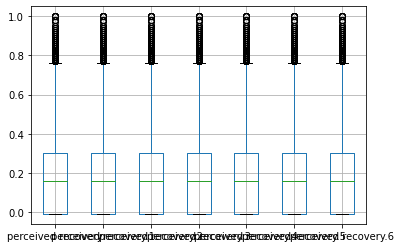

In [20]:
df_health.boxplot(column=models_keys['features']['perceived recovery'])

In [21]:
models_keys['features']['perceived recovery']

['perceived recovery',
 'perceived recovery.1',
 'perceived recovery.2',
 'perceived recovery.3',
 'perceived recovery.4',
 'perceived recovery.5',
 'perceived recovery.6']

<AxesSubplot:>

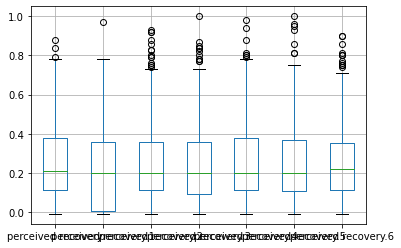

In [22]:
df_injury.boxplot(column=models_keys['features']['perceived recovery'])

## Graficas de caracteriticas 

Se grafican los puntos del conjunto de cracteristicas por clases. 
Ej: Priemra grafica con nr: session, nr: session.1, nr: session.2,...
Las graficas son por clases

In [23]:
#LLenar el diccionario con al informacion del dataset
#models_data = {
 #   "features" : {},
  #  "days"     : {}
#}

for f in models_keys['features'].keys():
    columns = models_keys['features'][f]
    columns.append("injury")
    models_data['features'][f] = []
    models_data['features'][f] = data[columns]

for f in models_keys['days'].keys():
    columns = models_keys['days'][f]
    columns.append("injury")
    models_data['days'][f] = []
    models_data['days'][f] = data[columns]



/Users/user/opt/anaconda3/envs/Aprendizaje_Automatico/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/user/opt/anaconda3/envs/Aprendizaje_Automatico/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/user/opt/anaconda3/envs/Aprendizaje_Automatico/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

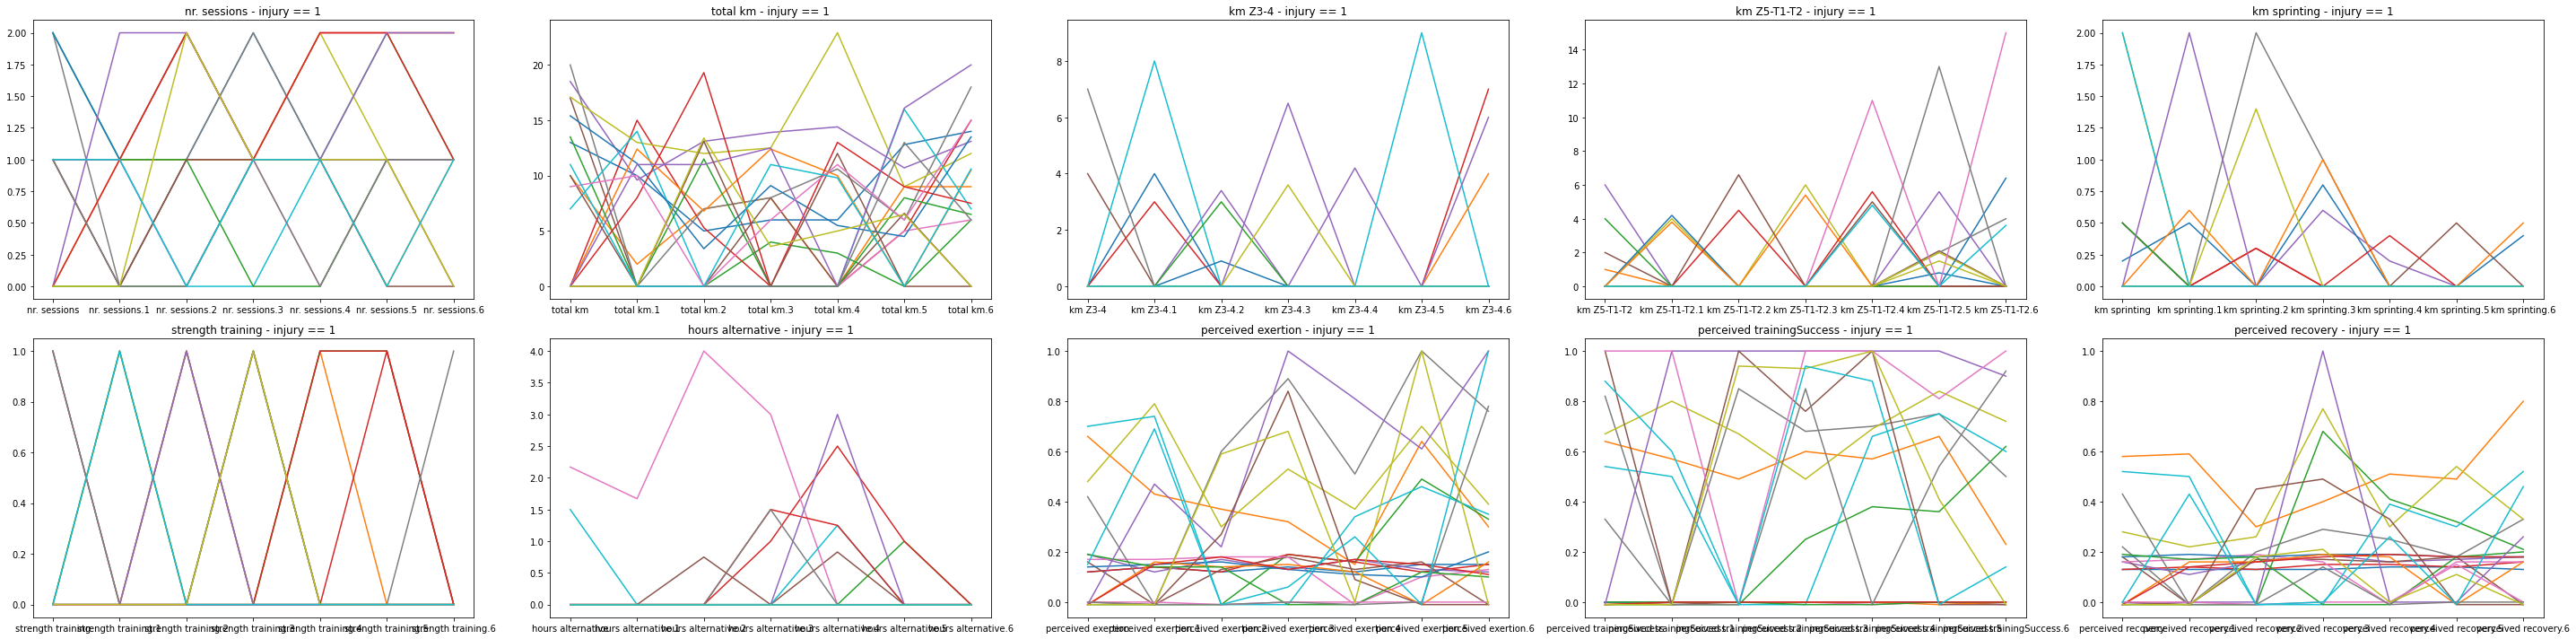

In [24]:
fig, axs= plt.subplots(2,5,figsize=(40,10) ,sharey=False, tight_layout=True)
for i, feature in enumerate(models_data["features"].keys()):
    data=models_data["features"][feature][models_data["features"][feature]['injury']==1]
    data.drop(columns='injury', inplace=True)
    if i<5:
        axs[0][i].plot( data.columns, data[30:50].T)
        axs[0][i].set_title(feature + ' - injury == 1')
    else:
        axs[1][i-5].plot( data.columns, data[30:50].T)
        axs[1][i-5].set_title(feature + ' - injury == 1')
#En caso de quere guardar la imagen descomentar la siguiente linea
#save_fig("Features_injury_1")
fig.show()

/Users/user/opt/anaconda3/envs/Aprendizaje_Automatico/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/user/opt/anaconda3/envs/Aprendizaje_Automatico/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/user/opt/anaconda3/envs/Aprendizaje_Automatico/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

Saving figure Features_injury_0


/Users/user/opt/anaconda3/envs/Aprendizaje_Automatico/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


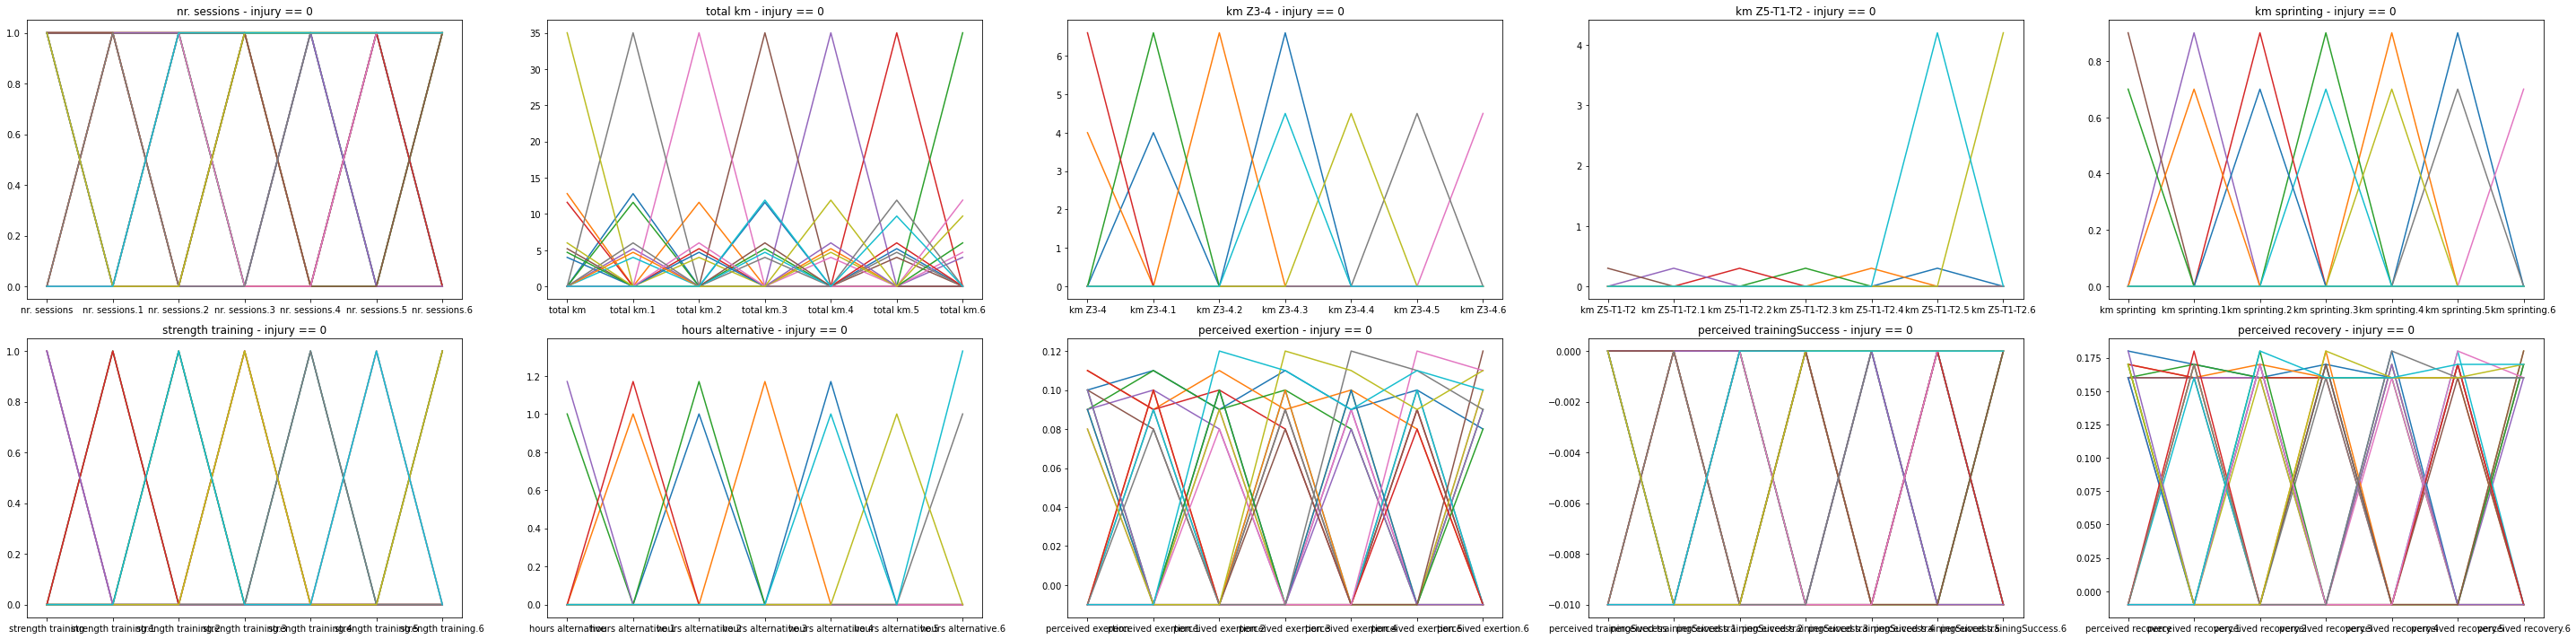

In [25]:
fig, axs= plt.subplots(2,5,figsize=(40,10) ,sharey=False, tight_layout=True)
for i, feature in enumerate(models_data["features"].keys()):
    data=models_data["features"][feature][models_data["features"][feature]['injury']==0]    
    data.drop(columns='injury', inplace=True)
    if i<5:
        axs[0][i].plot( data.columns, data[30:50].T)
        axs[0][i].set_title(feature + ' - injury == 0')

    else:
        axs[1][i-5].plot( data.columns, data[30:50].T)
        axs[1][i-5].set_title(feature + ' - injury == 0')

#En caso de quere guardar la imagen descomentar la siguiente linea
#save_fig("Features_injury_0")
fig.show()